# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 3: Polynomial and LASSO Regression

**Harvard University**<br/>
**Fall 2021**<br/>
**Instructors**: Pavlos Protopapas and Natesh Pillai

<hr style="height:2.4pt">

In [1]:
# RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get(
    "https://raw.githubusercontent.com/Harvard-IACS/2021-CS109A/master/"
    "themes/static/css/cs109.css"
).text
HTML(styles)

### Import Libraries

In [2]:
from collections import Counter
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.utils import shuffle

%matplotlib inline

<a id="instructions"></a>

<hr style="height:2pt">

### INSTRUCTIONS

- **THIS IS AN INDIVIDUAL ASSIGNMENT. Collaboration on this homework is NOT PERMITTED.**

- **THIS IS A TWO-WEEK HOMEWORK**. The material is indeed two-weeks-worth of work, so make sure you start it early!!!

- To submit your assignment follow the instructions given in Canvas.

- Please **restart the kernel and run the entire notebook again before you submit.**

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code continues to work, restart the kernel and rerun your notebook periodically while working through this assignment. 

- We have tried to include all the libraries you may need to do the assignment in the imports cell provided below. **Please use only the libraries provided in those imports.**

- Please use `.head(...)` when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate and report $R^2$", do not just output the value from a cell. Write a `print(...)` function that clearly labels the output, includes a reference to the calculated value, and rounds it to a reasonable number of digits. **Do not hard code values in your printed output**. For example, this is an appropriate print statement:
```python
print(f'The R^2 is {R:.4f}')
```
- **Your plots MUST be clearly labeled and easy to read,** including clear labels for the $x$ and $y$ axes, a descriptive title ("MSE plot" is NOT a descriptive title; "95% confidence interval of coefficients for degree-5 polynomial model" on the other hand is descriptive), a legend when appropriate, and clearly formatted text and graphics.

- **Your code may also be evaluated for efficiency and clarity.** As a result, correct output is not always sufficient for full credit.

<hr style="height:2pt">

<a id="contents"></a>

## Notebook contents

- [**Overview and data description**](#intro)


- [**Question 1: Data visualization [5 pts]**](#part1)
  - [Solutions](#part1solutions)


- [**Your Homework 3 roadmap**](#roadmap)


- [**Question 2: Guesstimate the polynomial relationship [14 pts]**](#part2)
  - [Solutions](#part2solutions)


- [**Question 3: Use a validation set to find the most promising polynomial relationship [12 pts]**](#part3)
  - [Solutions](#part3solutions)


- [**Question 4: Finding the best model by k-fold cross validation [14 pts]**](#part4)
  - [Solutions](#part4solutions)


- [**Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]**](#part5)
  - [Solutions](#part5solutions)


- [**Question 6: Improving model consistency with LASSO regularization [33 pts]**](#part6)
  - [Solutions](#part6solutions)


- [**Question 7: Analyze your best test MSEs for each section of the homework [6 pts]**](#part7)
  - [Solutions](#part7solutions)

<a id="intro"></a>

## Overview and data description

[Return to contents](#contents)

### Predicting percentage change in bacteria populations given their spreading factor

In this homework, we will explore polynomial regression for predicting a quantitative variable. Specifically, we will build regression models that can predict the percentage change in bacteria population after 4 hours based on their "spreading factor". These prediction models can be useful in clustering of a novel bacteria to any class. 

If the percentage of change in population is positive, this indicates that the size of the bacteria population has grown. One important factor to note is that the percentage change could be negative. This indicates that within the specified time frame, the population of the bacteria has decreased from its original size.

The data set for this problem has already been split for you. You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively. The first column in each file gives information about the change in percentage of the population and the second column contains the spreading factor of bacteria populations.


### Problem Description

We will predict the percentage change in population, given the spreading factor. For this exercise, we will consider the `Spreading_factor` to be our predictor variable and `Perc_population` to be our response variable. We will explore several different approaches, with mean squared error ($MSE$) as an evaluative criteria, for finding the best fit and most robust polynomial regression for modeling this relationship.


<a id="part1"></a>

## <div class='exercise'>Question 1: Data visualization [5 pts]</div> 
    
[Return to contents](#contents)
    
**1.1** Generate a scatter plot of the data points in the `bacteria_train.csv` file with the spreading factor on the $x$-axis and the percentage change on the $y$-axis.

**REMEMBER:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals that clearly communicate the data (as described in the [INSTRUCTIONS](#instructions) at the start of this notebook). Visuals should typically be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

**1.2** Based on the graph, is there any discernable relationship between the spreading factor and percentage change in population?

<a id="part1solutions"></a>

## Question 1: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**1.1** Generate a scatter plot of the data points in the `bacteria_train.csv` file with the spreading factor on the $x$-axis and the percentage change on the $y$-axis.

**REMEMBER:** In this course, you will be expected to ALWAYS label your axes, title your graphs, and produce visuals that clearly communicate the data (as described in the [INSTRUCTIONS](#instructions) at the start of this notebook). Visuals should typically be accompanied by text identifying the key point of the visual and defending any choices you make as a data scientist regarding the visual to best communicate your data.

</div>

In [3]:
# your code here
# Load in the train data
df_train = pd.read_csv("data/bacteria_train.csv")
df_train.head()

,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


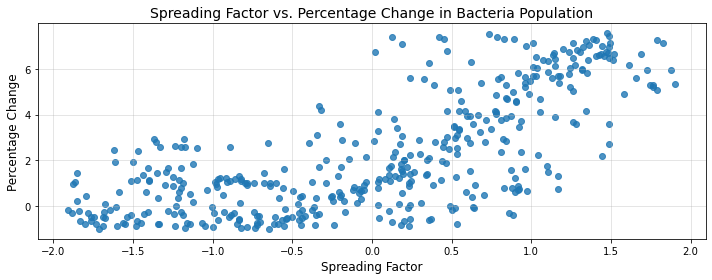

In [4]:
fig, ax = plt.subplots(1,1, figsize =(10,4))
plt.scatter(df_train.Spreading_factor, df_train.Perc_population, alpha=0.8)
plt.title(
    "Spreading Factor vs. "
    "Percentage Change in Bacteria Population",
    fontsize=14,
)
plt.xlabel("Spreading Factor", fontsize=12)
plt.ylabel("Percentage Change", fontsize=12)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.show()

<div class='exercise-r'>

**1.2** Based on the graph, is there any discernable relationship between the spreading factor and percentage change in population?

</div>

Yes, there is a trend between Spreading Factor and the Percentage Change in the Bacteria Population. The relationship appears to be non-linear but a positive correlation.


<a id="roadmap"></a>

<hr style='height:2px'> 

## Your Homework 3 roadmap

[Return to contents](#contents)

**We will be following this roadmap for Question 2 through Question 6:**

![](data/soln-roadmap.png)


<a id="part2"></a>

## <div class='exercise'>Question 2: Guesstimate the polynomial relationship [14 pts]</div> 

[Return to contents](#contents)


**2.1** Guesstimate the degree of the polynomial regression that may best fit the data given our observation of the data in Question 1, and then fit that model following the requirements outlined below:
- Create a single dictionary called `best_mse_dict` to store the best test $MSE$s for each type of model we will be building in this notebook. The keys of this dictionary will be the question number, and the values will be the $MSE$ values. So, for this question, you will have `best_mse_dict["2.1"] = ...` .

- Generate `PolynomialFeatures(...)` for your guesstimated degree and fit a polynomial regression using scikit-learn's `LinearRegression(...)` on the training set.
- Generate a plot with both the train and test data, as well as your prediction curve.
- Compute and print the $MSE$ on the test set and save that value to `best_mse_dict`.
- Explain the rationale for your choice of degree (i.e. your "guesstimation") and comment on the fit of your model.
  
**2.2** Now we will compute confidence intervals for the coefficients generated in our model. For the same degree polynomial regression fit above in 2.1, compute and plot the 95% confidence interval of the beta (i.e. $\beta$) values obtained in that regression model. Be certain to meet these primary requirements:

- Report the coefficient values of the model fit above in 2.1.
- Use bootstrapping to generate your 95% confidence intervals by refitting your model to each bootstrapped sample of your training data (you can limit your number of bootstraps to 100).
- For each bootstrap, store the coefficients of the model, and use those stored coefficients to compute the $2.5$ and $97.5$ confidence bounds.
- Plot the bootstrapped coefficients as a grid of histograms, one histogram for each $\beta_i$, illustrating the distribution of bootstrapped coefficients for each $\beta_i$. Each distribution should indicate the regions of 95% confidence. Use `plt.subplots(...)` to arrange your histograms as a grid of plots.
- Comment on your findings.

**REMEMBER:** Bootstrapped samples should always be the same size as the original data and sampled with replacement.

<a id="part2solutions"></a>

## Question 2: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**2.1** Guesstimate the degree of the polynomial regression that may best fit the data given our observation of the data in Question 1, and then fit that model following the requirements outlined below:
- Create a single dictionary called `best_mse_dict` to store the best test $MSE$s for each type of model we will be building in this notebook. The keys of this dictionary will be the question number, and the values will be the $MSE$ values. So, for this question, you will have `best_mse_dict["2.1"] = ...` .

- Generate `PolynomialFeatures(...)` for your guesstimated degree and fit a polynomial regression using scikit-learn's `LinearRegression(...)` on the training set.
- Generate a plot with both the train and test data, as well as your prediction curve.
- Compute and print the $MSE$ on the test set and save that value to `best_mse_dict`.
- Explain the rationale for your choice of degree (i.e. your "guesstimation") and comment on the fit of your model.

</div>

In [5]:
# Load in the test data
df_test = pd.read_csv("data/bacteria_test.csv")
df_test.head()

,Perc_population,Spreading_factor
0,-0.516,-1.138880
1,-0.683,-1.818070
2,-0.045,-1.883300
3,1.125,-0.839582
4,-0.679,-1.478480


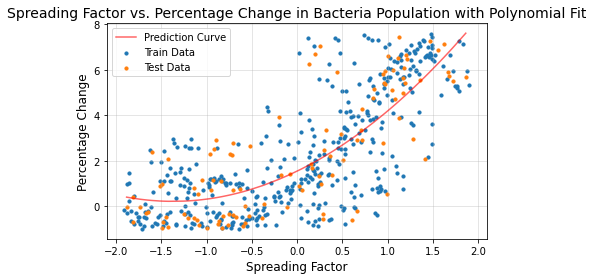

The MSE test value is 2.675 


In [6]:
# your code here
# Create the best_mse_dict to store our MSE values over the course of this homework
best_mse_dict = {}

# Load split datasets
x_train = df_train[['Spreading_factor']].values
y_train = df_train['Perc_population'].values
x_test = df_test[['Spreading_factor']].values
y_test = df_test['Perc_population'].values

# Guess the correct polynomial degree based on the above graph
guess_degree = 2

# Generate polynomial features on the train data
x_poly_train = PolynomialFeatures(degree=guess_degree).fit_transform(x_train)

# Generate polynomial features on the test data
x_poly_test = PolynomialFeatures(degree=guess_degree).fit_transform(x_test)

# Initialize a model to perform polynomial regression
polymodel = LinearRegression(fit_intercept=False)

# Fit the model on the polynomial transformed train data
polymodel.fit(x_poly_train,y_train)

# Predict on the entire polynomial transformed test data
y_poly_pred = polymodel.predict(x_poly_test)

# Helper code to visualise the results
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y_test
# y_test values corresponding to sorted test data
y_test = y_test[idx]

# Non-linear predicted values
y_poly_pred= y_poly_pred[idx]

# First plot x & y values using plt.scatter
plt.scatter(x_train, y_train, s=10, label="Train Data")
plt.scatter(x_test, y_test, s=10, label="Test Data")

# Plot the polynomial regression fit curve
# Use x_test as apposed to x_poly_test because x_poly_test is a matrix
plt.plot(x_test, y_poly_pred, label="Prediction Curve", color='red', alpha=0.6)

# Graph the train and test data as well as the polynomial fit
plt.title(
    "Spreading Factor vs. "
    "Percentage Change in Bacteria Population with Polynomial Fit",
    fontsize=14,
)
plt.xlabel("Spreading Factor", fontsize=12)
plt.ylabel("Percentage Change", fontsize=12)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.legend()
plt.show()

# Calculate MSE
testmse = mean_squared_error(y_test, y_poly_pred)
print(f"The MSE test value is {testmse:.3f} ")
best_mse_dict["2.1"] = testmse

**INTERPRETATION:**

My guestimate was for a 2nd degree polynomial. This is due to the single curve that the plot appears to take. The prediction curve does match this shape quite well but the MSE could be improved upon.


<div class='exercise-r'>

**2.2** Now we will compute confidence intervals for the coefficients generated in our model. For the same degree polynomial regression fit above in 2.1, compute and plot the 95% confidence interval of the beta (i.e. $\beta$) values obtained in that regression model. Be certain to meet these primary requirements:

- Report the coefficient values of the model fit above in 2.1.
- Use bootstrapping to generate your 95% confidence intervals by refitting your model to each bootstrapped sample of your training data (you can limit your number of bootstraps to 100).
- For each bootstrap, store the coefficients of the model, and use those stored coefficients to compute the $2.5$ and $97.5$ confidence bounds.
- Plot the bootstrapped coefficients as a grid of histograms, one histogram for each $\beta_i$, illustrating the distribution of bootstrapped coefficients for each $\beta_i$. Each distribution should indicate the regions of 95% confidence. Use `plt.subplots(...)` to arrange your histograms as a grid of plots.
- Comment on your findings.

**REMEMBER:** Bootstrapped samples should always be the same size as the original data and sampled with replacement.

</div>

Coefficient Values of the Model Fit Above in 2.1: [1.54791898 1.93796806 0.70637891]
Confidence Intervals for Beta 0: (1.3116359729835092, 1.7896205971962844)
Confidence Intervals for Beta 1: (1.7976054201866323, 2.0947062246335366)
Confidence Intervals for Beta 2: (0.5633724743311534, 0.8781902451867163)


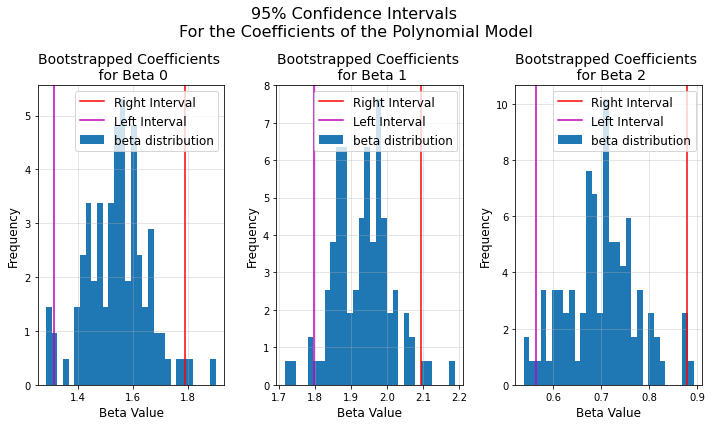

In [7]:
# your code here
### Report the coefficient values of the model fit above in 2.1.
print('Coefficient Values of the Model Fit Above in 2.1:', polymodel.coef_)

### Use bootstrapping to generate your 95% confidence intervals by refitting your model to each bootstrapped sample of your training data .
# Set the number of bootstraps (limit to 100)
numboot = 100

# Guess the correct polynomial degree
guess_degree = 2

# Initialize a dictionary to store the coefficient values
perc_dict = {}

for i in range(guess_degree+1):
    perc_dict[i] = []

# Loop through each bootstrap
for i in range(numboot):

    # Create bootstrapped version of the training data using the sample function
    # Set frac=1 and replace=True to get a bootstrap
    df_new = df_train.sample(frac=1, replace=True)

    # Get the predictor data ('Spreading_factor') from the new bootstrapped data
    x_sample = df_new[['Spreading_factor']]

    # Get the response data ('Perc_population') from the new bootstrapped data
    y_sample = df_new.Perc_population

    # Generate polynomial features on the train data
    x_poly_sample = PolynomialFeatures(degree=guess_degree).fit_transform(x_sample)

    # Initialize a model to perform polynomial regression
    polymodel_sample = LinearRegression(fit_intercept=False)

    # Fit the model on the polynomial transformed train data
    polymodel_sample.fit(x_poly_sample,y_sample)

    # Predict on the entire polynomial transformed test data
    y_poly_pred_sample = polymodel_sample.predict(x_poly_sample)
    
    for i in range(guess_degree+1):
        perc_dict[i].append(polymodel_sample.coef_[i])

# Calculate confidence intervals for each beta
beta_CI = {}
for i in range(guess_degree+1):
    beta_CI[i] = (np.percentile(perc_dict[i],2.5),np.percentile(perc_dict[i], 97.5))

# Plot the histograms
fig, ax = plt.subplots(1,guess_degree+1,figsize = (10, 6))
fig.suptitle(
    "95% Confidence Intervals \n"
    "For the Coefficients of the Polynomial Model",
    fontsize=16,
)

for i in range(guess_degree+1):
    print("Confidence Intervals for Beta " + str(i) + ": " + str(beta_CI[i]))
    ax[i].hist(perc_dict[i], bins = 30, label = 'beta distribution', align = 'left', density = True)
    ax[i].axvline(beta_CI[i][1], 0, 1, color = 'r', label = 'Right Interval')
    ax[i].axvline(beta_CI[i][0], 0, 1, color = 'm', label = 'Left Interval')
    ax[i].set_xlabel("Beta Value", fontsize=12)
    ax[i].set_ylabel("Frequency", fontsize=12)
    ax[i].set_title("Bootstrapped Coefficients \n for Beta " + str(i), fontsize=14)
    ax[i].legend(loc="upper right", fontsize=12)

for a in ax:
    a.grid(":", alpha=0.4)

plt.tight_layout()
plt.show()



**INTERPRETATION:**

Looking at these results we get a sense of the uncertainty over our estimates. Our coefficients from 2.1 fall within the 95% confidence intervals which tells us the results are not anamolous. However, to make further deductions on how certain we are in our estimation of the coefficients, further analysis (such as t-tests) must be done.


<a id="part3"></a>

## <div class='exercise'>Question 3: Use a validation set to find the most promising polynomial relationship [12 pts]</div> 

[Return to contents](#contents)

**3.1** Find the best degree polynomial relationship using a single validation set. Be certain to meet the requirements outlined below:

- Split your training data such that you separate out a single 20% validation split.
- Fit polynomial regression models up to **degree 30** on the 80% training set (one model for each degree polynomial regression).
- Generate a single plot illustrating the train and validation $MSE$ values for each fitted degree polynomial regression model.
- Compare the validation $MSE$ values and select and report the degree for which the validation error is lowest.


**3.2** Now, with the best degree selected, train the polynomial regression on the **complete training set** (including the observations that you had previously removed to make the validation set). Report the train and test $MSE$ and add the test $MSE$ to `best_mse_dict`.


**3.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your "guesstimated" model from [Question 2](#part2solutions).

<a id="part3solutions"></a>

## Question 3: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**3.1** Find the best degree polynomial relationship using a single validation set. Be certain to meet the requirements outlined below:

- Split your training data such that you separate out a single 20% validation split.
- Fit polynomial regression models up to **degree 30** on the 80% training set (one model for each degree polynomial regression).
- Generate a single plot illustrating the train and validation $MSE$ values for each fitted degree polynomial regression model.
- Compare the validation $MSE$ values and select and report the degree for which the validation error is lowest.

</div>

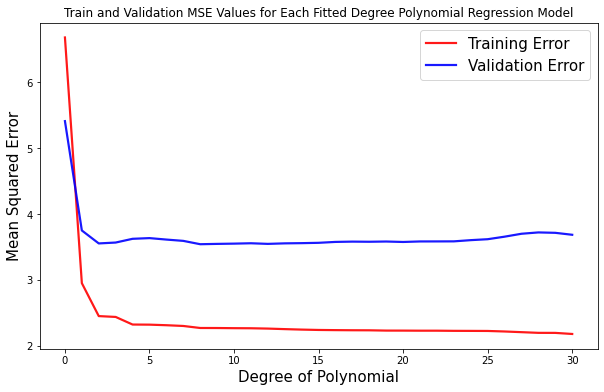

The lowest validation error occurs at degree 8 with an MSE of 3.541081913996495


In [8]:
# your code here
### Split your training data such that you separate out a single 20% validation split.
x_single_train, x_single_test, y_single_train, y_single_test = train_test_split(x_train, y_train, test_size=0.20, random_state=109)

### Fit polynomial regression models up to degree 30 on the 80% training set (one model for each degree polynomial regression).
# Create a list of degrees
degrees = range(0, 31)

# Initialize lists to store the MSE vals for the train and validation sets
train_mse_list = []
test_mse_list = []


# Loop through each degree
for i in degrees:
    # Generate polynomial features on the train data
    x_single_train_poly = PolynomialFeatures(degree=i).fit_transform(x_single_train)
    x_single_test_poly = PolynomialFeatures(degree=i).fit_transform(x_single_test)

    # Initialize a model to perform polynomial regression
    polymodel_single = LinearRegression(fit_intercept=False)

    # Fit the model on the polynomial transformed train data
    polymodel_single.fit(x_single_train_poly,y_single_train)

    # Predict on the entire polynomial transformed test data
    y_poly_pred_train = polymodel_single.predict(x_single_train_poly)
    y_poly_pred_test = polymodel_single.predict(x_single_test_poly)
    
    train_mse = mean_squared_error(y_single_train, y_poly_pred_train)
    test_mse = mean_squared_error(y_single_test, y_poly_pred_test)
    
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    
### Generate a single plot illustrating the train and validation 𝑀𝑆𝐸  values for each fitted degree polynomial regression model.
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(degrees, train_mse_list, color='r', alpha = 0.9, label = "Training Error", lw=2.2)
ax.plot(degrees, test_mse_list, color='b', alpha = 0.9, label = "Validation Error", lw=2.2)
ax.legend(loc='best',fontsize=15)
ax.set_xlabel("Degree of Polynomial", fontsize=15)
ax.set_ylabel("Mean Squared Error", fontsize=15)
ax.set_title("Train and Validation MSE Values for Each Fitted Degree Polynomial Regression Model")
plt.show();

### Compare the validation  𝑀𝑆𝐸  values and select and report the degree for which the validation error is lowest.
min_mse = min(test_mse_list)
best_degree = degrees[test_mse_list.index(min_mse)]
print("The lowest validation error occurs at degree " + str(best_degree) + " with an MSE of " + str(min_mse))


<div class='exercise-r'>

**3.2** Now, with the best degree selected, train the polynomial regression on the **complete training set** (including the observations that you had previously removed to make the validation set). Report the train and test $MSE$ and add the test $MSE$ to `best_mse_dict`.

</div>

In [9]:
# your code here
# Load split datasets
x_train = df_train[['Spreading_factor']].values
y_train = df_train['Perc_population'].values
x_test = df_test[['Spreading_factor']].values
y_test = df_test['Perc_population'].values

# Use the "correct" polynomial degree based on the above graph
guess_degree = 8

# Generate polynomial features on the train data
x_poly_train = PolynomialFeatures(degree=guess_degree).fit_transform(x_train)

# Generate polynomial features on the test data
x_poly_test = PolynomialFeatures(degree=guess_degree).fit_transform(x_test)

# Initialize a model to perform polynomial regression
polymodel = LinearRegression(fit_intercept=False)

# Fit the model on the polynomial transformed train data
polymodel.fit(x_poly_train,y_train)

# Predict on the entire polynomial transformed test data
y_poly_pred_train = polymodel.predict(x_poly_train)
y_poly_pred_test = polymodel.predict(x_poly_test)

# Calculate MSE and report as requested
trainmse = mean_squared_error(y_train, y_poly_pred_train)
print(f"The MSE train value is {trainmse:.3f} ")

testmse = mean_squared_error(y_test, y_poly_pred_test)
print(f"The MSE test value is {testmse:.3f} ")

best_mse_dict["3.2"] = testmse
print("Here's the latest on the best MSE scores so far: " + str(best_mse_dict))

The MSE train value is 2.513 
The MSE test value is 2.613 
Here's the latest on the best MSE scores so far: {'2.1': 2.6748625754403093, '3.2': 2.61301063735301}


<div class='exercise-r'>

**3.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your "guesstimated" model from [Question 2](#part2solutions).

</div>

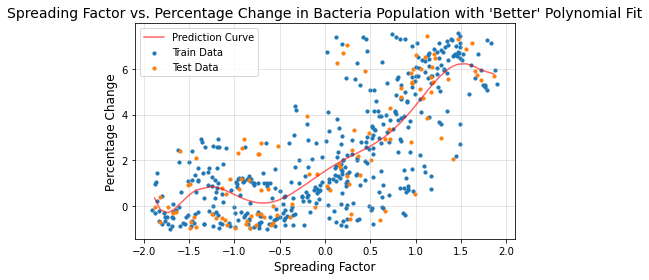

In [10]:
# your code here
# Helper code to visualise the results
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y_test
# y_test values corresponding to sorted test data
y_test = y_test[idx]

# Non-linear predicted values
y_poly_pred = y_poly_pred_test[idx]

# First plot x & y values using plt.scatter
plt.scatter(x_train, y_train, s=10, label="Train Data")
plt.scatter(x_test, y_test, s=10, label="Test Data")

# Plot the polynomial regression fit curve
# Use x_test as apposed to x_poly_test because x_poly_test is a matrix
plt.plot(x_test, y_poly_pred, label="Prediction Curve", color='red', alpha=0.6)

# Graph the train and test data as well as the polynomial fit
plt.title(
    "Spreading Factor vs. "
    "Percentage Change in Bacteria Population with 'Better' Polynomial Fit",
    fontsize=14,
)
plt.xlabel("Spreading Factor", fontsize=12)
plt.ylabel("Percentage Change", fontsize=12)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.legend()
plt.show()

**INTERPRETATION:**

With this model we get a slightly lower MSE value and the fit of this graph does appear to match the data, however, looking back at the graph from 3.1 we can see that degree 8 and 2 both had similar MSE values so this seems like a pretty minimal improvement.


<a id="part4"></a>

## <div class='exercise'>Question 4: Finding the best model by k-fold cross validation [14 pts]</div> 

[Return to contents](#contents)

**4.1** In this part we find the best degree polynomial regression by running the model on a range of degree values and using k-fold cross validation on the `bacteria_train.csv` dataset.

- Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
- Generate a single plot showing the mean train and validation $MSE$ values (see note below) for each degree polynomial regression, including the +/- 1 standard deviation bounds for the validation $MSE$ values. Comment on trends and findings illustrated by your plot.
- Print the degree of the best model, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.

**NOTE:** When we refer to train and validation $MSE$ values here in Question 4.1 and in future problems where we are performing cross validation, we are referring specifically to the cross-validation generated train and validation $MSE$ values. Just please remember, when accessing your validation $MSE$ values while performing cross validation with scikit-learn's `cross_validate(...)`, scikit-learn rather confusingly refers to its validation scores as `test_score` in the dictionary that it returns, even though those values are actually validation scores. Please see the `cross_validate(...)` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) for more info on this function.

**4.2** Fit the best model on the entire training data and report the $MSE$.

- For the best degree polynomial regression identified in Question 4.1 above, train on the complete training set from the `bacteria_train.csv` file and predict on the test data.
- Report the coefficients of the model.
- Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.


**4.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in [Question 3](#part3solutions).


<a id="part4solutions"></a>

## Question 4: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**4.1** In this part we find the best degree polynomial regression by running the model on a range of degree values and using k-fold cross validation on the `bacteria_train.csv` dataset.

- Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
- Generate a single plot showing the mean train and validation $MSE$ values (see note below) for each degree polynomial regression, including the +/- 1 standard deviation bounds for the validation $MSE$ values. Comment on trends and findings illustrated by your plot.
- Print the degree of the best model, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.

**NOTE:** When we refer to train and validation $MSE$ values here in Question 4.1 and in future problems where we are performing cross validation, we are referring specifically to the cross-validation generated train and validation $MSE$ values. Just please remember, when accessing your validation $MSE$ values while performing cross validation with scikit-learn's `cross_validate(...)`, scikit-learn rather confusingly refers to its validation scores as `test_score` in the dictionary that it returns, even though those values are actually validation scores. Please see the `cross_validate(...)` [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html) for more info on this function.

</div>

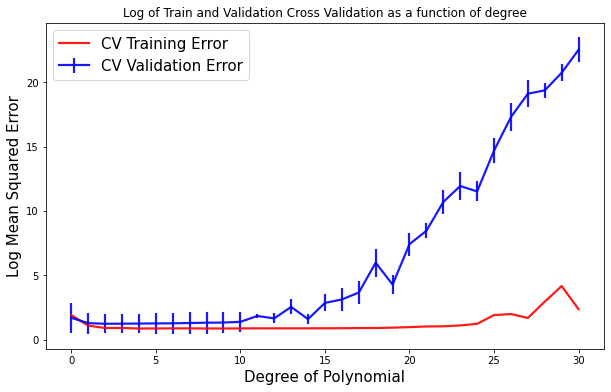

The lowest mean validation MSE occurs at degree 2
The corresponding mean train MSE value is 2.375654612461972
The corresponding mean validation MSE value is 3.4336183542563914


In [46]:
# your code here
### Use scikit-learn's cross_validate(...) to perform cross validation with k=10 for each degree polynomial regression up to degree 30.
# Load split datasets
x_train = df_train[['Spreading_factor']].values
y_train = df_train['Perc_population'].values
x_test = df_test[['Spreading_factor']].values
y_test = df_test['Perc_population'].values

# Split your training data such that you separate out a single 20% validation split.
x_ttrain, x_tval, y_ttrain, y_tval = train_test_split(x_train, y_train, test_size=0.20, random_state=109)

# Create a list of degrees
degrees = range(0, 31)

# Initialize lists to store cross-validation MSEs
cross_validation_error_train = []
cross_validation_error_val = []
std_dev_val = []

# Loop through each degree
for d in degrees:
    # Compute the polynomial features for the train data
    x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_ttrain)

    # Compute the polynomial features for the validation data
    x_poly_val = PolynomialFeatures(degree=d).fit_transform(x_tval)
    
    # Initialize a Linear Regression object
    lreg = LinearRegression(fit_intercept = False)
    
    # Perform cross-validation on the train and test data with 10 folds and get the mse_scores
    mse_score_train = cross_validate(lreg, x_poly_train, y_ttrain, cv=10, scoring="neg_mean_squared_error", return_train_score=True )
    mse_score_val = cross_validate(lreg, x_poly_val, y_tval, cv=10, scoring="neg_mean_squared_error", return_train_score=True )
    
    # Compute the mean of the cross validation error and store in respective list 
    cross_validation_error_train.append(-1*np.mean(mse_score_train['test_score']))
    cross_validation_error_val.append(-1*np.mean(mse_score_val['test_score']))
    
    # Compute normalized standard deviation and add to list
    std_dev_val.append(np.std(mse_score_val['test_score'])/(-1*np.mean(mse_score_val['test_score'])))

### Generate a single plot showing the mean train and validation  𝑀𝑆𝐸  values for each degree polynomial regression,
### including the +/- 1 standard deviation bounds for the validation  𝑀𝑆𝐸  values.
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(degrees, np.log(cross_validation_error_train), color='r', alpha = 0.9, label = "CV Training Error", lw=2.2)
ax.errorbar(degrees, np.log(cross_validation_error_val), yerr=np.log(std_dev_val), color='b', alpha = 0.9, label = "CV Validation Error", lw=2.2)
ax.legend(loc='best',fontsize=15)
ax.set_xlabel("Degree of Polynomial", fontsize=15)
ax.set_ylabel("Log Mean Squared Error", fontsize=15)
ax.set_title("Log of Train and Validation Cross Validation as a function of degree")
plt.show();

### Print the degree of the best model, identified based on the lowest mean validation  𝑀𝑆𝐸 , along with the corresponding mean train and validation  𝑀𝑆𝐸  values.
min_mse_train = min(cross_validation_error_train)
min_mse_val = min(cross_validation_error_val)
best_degree = degrees[cross_validation_error_val.index(min_mse_val)]
print("The lowest mean validation MSE occurs at degree " + str(best_degree))
print("The corresponding mean train MSE value is " + str(min_mse_train))
print("The corresponding mean validation MSE value is " + str(min_mse_val))

**INTERPRETATION:**

The MSE of the degrees stays constant from around 2 to 10 degrees with little variance but after 10 degrees the MSE becomes greatly increased with a significant amount of deviation. 


<div class='exercise-r'>

**4.2** Fit the best model on the entire training data and report the $MSE$.

- For the best degree polynomial regression identified in Question 4.1 above, train on the complete training set from the `bacteria_train.csv` file and predict on the test data.
- Report the coefficients of the model.
- Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.

</div>

In [12]:
# your code here
### For the best degree polynomial regression identified in Question 4.1 above, train on the complete training set 
### from the bacteria_train.csv file and predict on the test data.
# Load split datasets
x_train = df_train[['Spreading_factor']].values
y_train = df_train['Perc_population'].values
x_test = df_test[['Spreading_factor']].values
y_test = df_test['Perc_population'].values

# Use the "correct" polynomial degree based on the above graph
guess_degree = 2

# Generate polynomial features on the train data
x_poly_train = PolynomialFeatures(degree=guess_degree).fit_transform(x_train)

# Generate polynomial features on the test data
x_poly_test = PolynomialFeatures(degree=guess_degree).fit_transform(x_test)

# Initialize a model to perform polynomial regression
polymodel = LinearRegression(fit_intercept=False)

# Fit the model on the polynomial transformed train data
polymodel.fit(x_poly_train,y_train)

# Predict on the entire polynomial transformed test data
y_poly_pred_train = polymodel.predict(x_poly_train)
y_poly_pred_test = polymodel.predict(x_poly_test)

### Report the coefficients of the model.
print('Coefficient Values of the Model Fit Above in 2.1:', polymodel.coef_)

### Report both the training and test  𝑀𝑆𝐸  values, and save the test  𝑀𝑆𝐸  to best_mse_dict.
# Calculate MSE and report as requested
trainmse = mean_squared_error(y_train, y_poly_pred_train)
print(f"The MSE train value is {trainmse:.3f} ")

testmse = mean_squared_error(y_test, y_poly_pred_test)
print(f"The MSE test value is {testmse:.3f} ")

best_mse_dict["4.2"] = testmse
print("Here's the latest on the best MSE scores so far: " + str(best_mse_dict))

Coefficient Values of the Model Fit Above in 2.1: [1.54791898 1.93796806 0.70637891]
The MSE train value is 2.662 
The MSE test value is 2.675 
Here's the latest on the best MSE scores so far: {'2.1': 2.6748625754403093, '3.2': 2.61301063735301, '4.2': 2.6748625754403093}


<div class='exercise-r'>

**4.3** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and how your model compares relative to the prior best-fit model you generated using just a single validation set in [Question 3](#part3solutions).

</div>

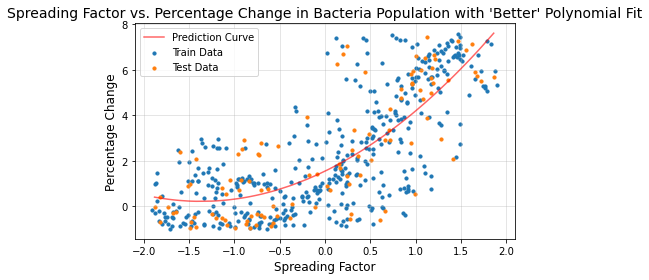

In [21]:
# your code here
# Helper code to visualise the results
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y_test
# y_test values corresponding to sorted test data
y_test = y_test[idx]

# Non-linear predicted values
y_poly_pred = y_poly_pred_test[idx]

# First plot x & y values using plt.scatter
plt.scatter(x_train, y_train, s=10, label="Train Data")
plt.scatter(x_test, y_test, s=10, label="Test Data")

# Plot the polynomial regression fit curve
# Use x_test as apposed to x_poly_test because x_poly_test is a matrix
plt.plot(x_test, y_poly_pred, label="Prediction Curve", color='red', alpha=0.6)

# Graph the train and test data as well as the polynomial fit
plt.title(
    "Spreading Factor vs. "
    "Percentage Change in Bacteria Population with 'Better' Polynomial Fit",
    fontsize=14,
)
plt.xlabel("Spreading Factor", fontsize=12)
plt.ylabel("Percentage Change", fontsize=12)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.legend()
plt.show()

**INTERPRETATION:**

This model does appear to fit the data better (as I anticipated in question 2) and it appears to not overfit the data. I believe that in question 3, an 8 degree polynomial was overfitting the data and I think a degree of 2 better represents the data.


<a id="part5"></a>

## <div class='exercise'>Question 5: Finding the most consistent model using k-fold cross validation with bootstraps [16 pts]</div> 

[Return to contents](#contents)

**5.1** In the previous part, we used $k$-fold cross validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps in [Question 2.2](#part2) to estimate the confidence intervals of our $\beta_i$ values. In this segment, we will use bootstrapping to test the robustness of our estimation. As before, we use the `bacteria_train.csv` data to train the model and `bacteria_test.csv` to test the model.

- Similar to Question 2.2, run **at least 100 bootstraps** of your data.
- For each bootstrap:
  - Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
  - Select the best cross-validated degree polynomial regression based on lowest mean validation $MSE$ and store that best degree to a list.
- After completing your bootstraps, you should have a list of "best degree" numbers, one degree for each completed bootstrap.
- Generate a bar plot, with the polynomial degree on the $x$-axis and the number of times that degree was deemed best on the $y$-axis, using the “best degree” numbers saved during your bootstraps.

**NOTE:** Once complete, your code for this problem will likely take several minutes to execute. This is to be expected.

**5.2** What are your observations? 

- Why do you see so much variation in the "best degree" over the bootstraps?
- Which degree polynomial regression will you choose as your overall best degree based on your bootstrapped results, and why? 

**5.3** Now, with the overall best degree identified with your bootstrapping results above, train the polynomial regression model on the **complete training set**. Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.

**5.4** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your cross-validated model from [Question 4](#part4solutions).

<a id="part5solutions"></a>

## Question 5: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**5.1** In the previous part, we used $k$-fold cross validation to find the best model. But how confident are you of your estimated best degree? We have already used bootstraps in [Question 2.2](#part2) to estimate the confidence intervals of our $\beta_i$ values. In this segment, we will use bootstrapping to test the robustness of our estimation. As before, we use the `bacteria_train.csv` data to train the model and `bacteria_test.csv` to test the model.

- Similar to Question 2.2, run **at least 100 bootstraps** of your data.
- For each bootstrap:
  - Use scikit-learn's `cross_validate(...)` to perform cross validation with `k=10` for each degree polynomial regression up to **degree 30**.
  - Select the best cross-validated degree polynomial regression based on lowest mean validation $MSE$ and store that best degree to a list.
- After completing your bootstraps, you should have a list of "best degree" numbers, one degree for each completed bootstrap.
- Generate a bar plot, with the polynomial degree on the $x$-axis and the number of times that degree was deemed best on the $y$-axis, using the “best degree” numbers saved during your bootstraps.

**NOTE:** Once complete, your code for this problem will likely take several minutes to execute. This is to be expected.

</div>

In [29]:
# your code here
### Similar to Question 2.2, run at least 100 bootstraps of your data.
numboot = 100

# Initialize a dictionary to store best degree numbers
best_degree_dict = {}

degrees = range(0,31)

for d in degrees:
    best_degree_dict[d] = 0

# Loop through each bootstrap
for i in range(numboot):
    # Create bootstrapped version of the training data using the sample function
    # Set frac=1 and replace=True to get a bootstrap
    df_new = df_train.sample(frac=1, replace=True)

    # Get the predictor data ('Spreading_factor') from the new bootstrapped data
    x_sample = df_new[['Spreading_factor']]

    # Get the response data ('Perc_population') from the new bootstrapped data
    y_sample = df_new.Perc_population
    
    cross_validation_error = []

    # Loop through each degree
    for d in degrees:
        # Compute the polynomial features for the train data
        x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_sample)

        # Initialize a Linear Regression object
        lreg = LinearRegression(fit_intercept = False)

        # Perform cross-validation on the train and test data with 10 folds and get the mse_scores
        mse_score = cross_validate(lreg, x_poly_train, y_sample, cv=10, scoring="neg_mean_squared_error", return_train_score=True )

        # Compute the mean of the cross validation error and store in a list 
        cross_validation_error.append(-1*np.mean(mse_score['test_score']))
    
    # Find the best degree
    min_mse = min(cross_validation_error)
    best_degree = degrees[cross_validation_error.index(min_mse)]
    best_degree_dict[best_degree] += 1

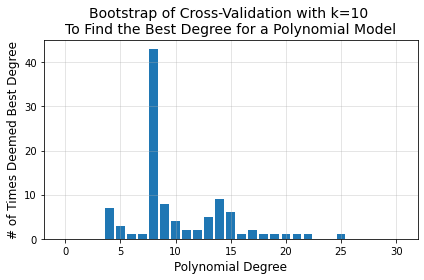

In [38]:
### Generate a bar plot, with the polynomial degree on the  𝑥 -axis and the number of times 
### that degree was deemed best on the  𝑦 -axis, using the “best degree” numbers saved during your bootstraps.
plt.bar(best_degree_dict.keys(), best_degree_dict.values())

# Graph the train and test data as well as the polynomial fit
plt.title(
    "Bootstrap of Cross-Validation with k=10 \n"
    "To Find the Best Degree for a Polynomial Model",
    fontsize=14,
)
plt.xlabel("Polynomial Degree", fontsize=12)
plt.ylabel("# of Times Deemed Best Degree", fontsize=12)
plt.grid(":", alpha=0.4)

plt.tight_layout()
plt.show()

<div class='exercise-r'>

**5.2** What are your observations? 

- Why do you see so much variation in the "best degree" over the bootstraps?
- Which degree polynomial regression will you choose as your overall best degree based on your bootstrapped results, and why? 


</div>

We see significant variation because bootstrapping grabs a random sample each time which lends itself to varied results. However, we see a very significant trend that a polynomial degree of 8 is best as it was selected as the best degree during our bootstrapping. I will choose degree 8 because it is so consistently chosen throughout our trials.


<div class='exercise-r'>

**5.3** Now, with the overall best degree identified with your bootstrapping results above, train the polynomial regression model on the **complete training set**. Report both the training and test $MSE$ values, and save the **test** $MSE$ to `best_mse_dict`.

</div>

In [39]:
# your code here
# Load split datasets
x_train = df_train[['Spreading_factor']].values
y_train = df_train['Perc_population'].values
x_test = df_test[['Spreading_factor']].values
y_test = df_test['Perc_population'].values

# Use the "correct" polynomial degree based on the above graph
guess_degree = 8

# Generate polynomial features on the train data
x_poly_train = PolynomialFeatures(degree=guess_degree).fit_transform(x_train)

# Generate polynomial features on the test data
x_poly_test = PolynomialFeatures(degree=guess_degree).fit_transform(x_test)

# Initialize a model to perform polynomial regression
polymodel = LinearRegression(fit_intercept=False)

# Fit the model on the polynomial transformed train data
polymodel.fit(x_poly_train,y_train)

# Predict on the entire polynomial transformed test data
y_poly_pred_train = polymodel.predict(x_poly_train)
y_poly_pred_test = polymodel.predict(x_poly_test)

# Calculate MSE and report as requested
trainmse = mean_squared_error(y_train, y_poly_pred_train)
print(f"The MSE train value is {trainmse:.3f} ")

testmse = mean_squared_error(y_test, y_poly_pred_test)
print(f"The MSE test value is {testmse:.3f} ")

best_mse_dict["5.3"] = testmse
print("Here's the latest on the best MSE scores so far: " + str(best_mse_dict))


The MSE train value is 2.513 
The MSE test value is 2.613 
Here's the latest on the best MSE scores so far: {'2.1': 2.6748625754403093, '3.2': 2.61301063735301, '4.2': 2.6748625754403093, '5.3': 2.61301063735301}


<div class='exercise-r'>

**5.4** Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)). Comment on how your model fits the data and compare it to the fit of your cross-validated model from [Question 4](#part4solutions).

</div>

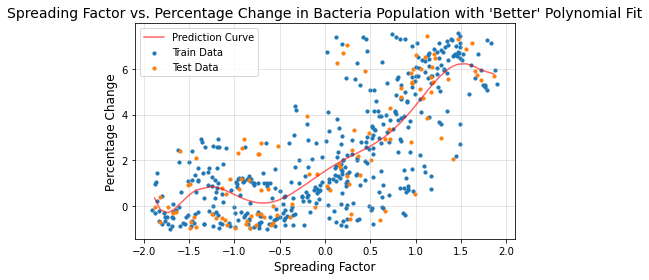

In [40]:
# your code here
# Helper code to visualise the results
idx = np.argsort(x_test[:,0])
x_test = x_test[idx]

# Use the above index to get the appropriate predicted values for y_test
# y_test values corresponding to sorted test data
y_test = y_test[idx]

# Non-linear predicted values
y_poly_pred = y_poly_pred_test[idx]

# First plot x & y values using plt.scatter
plt.scatter(x_train, y_train, s=10, label="Train Data")
plt.scatter(x_test, y_test, s=10, label="Test Data")

# Plot the polynomial regression fit curve
# Use x_test as apposed to x_poly_test because x_poly_test is a matrix
plt.plot(x_test, y_poly_pred, label="Prediction Curve", color='red', alpha=0.6)

# Graph the train and test data as well as the polynomial fit
plt.title(
    "Spreading Factor vs. "
    "Percentage Change in Bacteria Population with 'Better' Polynomial Fit",
    fontsize=14,
)
plt.xlabel("Spreading Factor", fontsize=12)
plt.ylabel("Percentage Change", fontsize=12)
plt.grid(":", alpha=0.4)
plt.tight_layout()
plt.legend()
plt.show()

**INTERPRETATION:**

Each time we conduct a further analysis it appears to bounce back and forth between choosing a degree of 2 or 8. My thoughts on this model still stay the same- it might be overfitted but does appear to fit our test data despite that observation. What's different this time from Question 4 and other previous questions is that instead of relying on my intuition of which degree is better, I have tangible proof from our bootstrapping, cross-validation experiment that a model with a degree of 8 does best over multiple trials.


<a id="part6"></a>

## <div class='exercise'>Question 6: Improving model consistency with LASSO regularization [33 pts]</div> 

[Return to contents](#contents)

In the previous sections, we compared many polynomial models to find the best degree. For each model of degree $n$, we considered all polynomial coefficients *up to* **degree $n$** using `PolynomialFeatures(...)`. In this section we will consider polynomial features of $n=30$, and a **best model** that could be chosen from any possible combination of our 30 degrees.

For instance, we could choose a best model with an arbitrary set of polynomial degrees up degree 30, such as $x^i \in [x^1, x^5, x^{19}, x^{24}]$, rather than the standard approach of using *all* consecutive degrees up to our maximum degree $n=30$ as in $x^i \in [x^0, x^1, ... , x^{30}]$.

However, the total number of such possible models for $n=30$ is $2^{30}\approx10^9$, and searching through all of them would be laborious and computationally inefficient. Instead, we can use $LASSO$ (i.e. $L1$) regularization, which "switches off" highly unstable degree coefficients by shrinking them to zero (or very close to zero), thus giving us an efficient solution to this particular combinatorial challenge.

**6.1 Find the best hyper-parameter alpha, $\alpha$**

First, we will use cross validation to find the the best regularization parameter $\alpha$. As before, we use the `bacteria_train.csv` for cross validation.

- Use polynomial features with **degree 30**. 
- For each regularization parameter $\alpha$ in $\alpha \in [10^{-3}, 10^{-2}, 10^{-1}, 10^{0}, 10^{1}]$, perform scikit-learn's `Lasso(...)` regression using `cross_validate(...)` with `k=10`.
- Do not worry about normalizing your $x$ values for any parts of Question 6. It will not meaningfully affect our final results here.
- Generate a single plot showing the mean train and validation $MSE$ values for each regularization parameter $\alpha$, including the +/- 1 standard deviation bounds for the validation $MSE$ values.
- Print the best $\alpha$ value, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.
- Did your $LASSO$ regression model generate any warnings while solving this problem? If so, what was that warning, what did it mean, what steps did you take to address the cause of this warning, and why might it be important to take those steps? (See the [NOTE](#part6note) at the bottom of Question 6 for some hints.)


**6.2 Find the most significant degrees**

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this best $\alpha$ value to find the "most significant" set of polynomial degrees by using bootstraps.

What we mean by this is, for each bootstrap of the data, you will get some set of degrees that are **significant**, as will be indicated by the value of their coefficients. Typically, while using $LASSO$ regularization, we would consider $\mid\beta_i\mid \gt 0$ as an indication of a particular coefficient's significance. However, for this particular exercise, we are going to use $\mid\beta_i\mid \gt 0.1$ as our criteria for significance (we have found this $0.1$ threshold to work well when designing this particular problem).

Based on this criteria, you will identify which degree coefficients are significant over many bootstrapped iterations with $n=30$ polynomial features and your chosen best $\alpha$ from Question 6.1.

- Use polynomial features with **degree 30**.
- Use a dictionary called `significant_degrees` to store a cumulative count for each degree identified as significant during your bootstraps.
- Run at least 100 bootstraps of your data.
- For each bootstrap:
  - Train a `Lasso(...)` model with the `best_alpha` identified in Question 6.1.
  - Identify the significant polynomial degree coefficients using $\mid\beta_i\mid \gt 0.1 $ as our threshold for significance.
  - For each significant coefficient, update the count of that degree in your `significant_degrees` dictionary.
- Generate a bar plot showing the count for each degree, showing how many times it was identified as significant over your bootstraps.
- Based on this plot, there should likely be a clear maximum degree, above which, few if any iterations have been identified as significant. Interpret your bar plot, choose a maximum degree polynomial based upon it, and explain your rationale for choosing that degree.


**6.3 Compute and print the test $MSE$**

From our Question 6.2 results, we can see that only some degrees are consistently significant over many bootstraps. You will now retrain the $L1$ regularized model on the entire **training** data and find the test $MSE$.

- Use polynomial features based on the maximum degree you identified using your results from Question 6.2 (for the sake of simplicity, use all degrees up to that maximum degree as is typically done in polynomial regression).
- Train your **LASSO** regularized model using your `best_alpha` hyper-parameter on the entire training set.
- Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)).
- Report the polynomial degrees and corresponding coefficients for this fully trained model that have an absolute value greater than 0.1 (i.e. $\mid\beta_i\mid \gt 0.1 $).
- Report the train and test $MSE$ and save the test $MSE$ to `best_mse_dict`.

**6.4 What are your observations?**

- Compare your `best_degree` from [Question 5](#part5solutions) with your chosen degree in 6.3 above and comment on the difference.
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Which degree coefficients in your best fit model from 6.3 are significant? If not all coefficients are significant, why?
- Would you expect your current model from 6.3 to be more "reliable" or robust than the models in Question 5 and prior? On what basis would you make a claim of its robustness?

<a id="part6note"></a>

**NOTE:**
- Once complete, your code for 6.1 and 6.2 will likely take several minutes to execute. This is to be expected.
- You will also likely receive `ConvergenceWarning` messages as your $LASSO$ regression models are trained.
  - Try resolving this warning by increasing your $LASSO$ models' maximum iterations by between 20-times to 100-times greater than scikit-learn's default number of iterations for its `Lasso(...)` implementation.
  - If that fails to resolve this warning, feel free to also uncomment the [IPython cell magic](https://ipython.readthedocs.io/en/stable/interactive/magics.html#cellmagic-capture) provided at the top the code cell (i.e. `%%capture --no-stdout --no-display`) to silence the warning.
  - Please note that using a `%%capture` cell magic such as this is a good alternative to using Python's native `warnings.filterwarnings(...)` when working in a Jupyter notebook, because it helps to ensure you don't accidentally silence important warnings in other parts of your notebook.


<a id="part6solutions"></a>

## Question 6: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**6.1 Find the best hyper-parameter alpha, $\alpha$**

First, we will use cross validation to find the the best regularization parameter $\alpha$. As before, we use the `bacteria_train.csv` for cross validation.

- Use polynomial features with **degree 30**. 
- For each regularization parameter $\alpha$ in $\alpha \in [10^{-3}, 10^{-2}, 10^{-1}, 10^{0}, 10^{1}]$, perform scikit-learn's `Lasso(...)` regression using `cross_validate(...)` with `k=10`.
- Do not worry about normalizing your $x$ values for any parts of Question 6. It will not meaningfully affect our final results here.
- Generate a single plot showing the mean train and validation $MSE$ values for each regularization parameter $\alpha$, including the +/- 1 standard deviation bounds for the validation $MSE$ values.
- Print the best $\alpha$ value, identified based on the lowest mean validation $MSE$, along with the corresponding mean train and validation $MSE$ values.
- Did your $LASSO$ regression model generate any warnings while solving this problem? If so, what was that warning, what did it mean, what steps did you take to address the cause of this warning, and why might it be important to take those steps? (See the [NOTE](#part6note) at the bottom of Question 6 for some hints.)

</div>

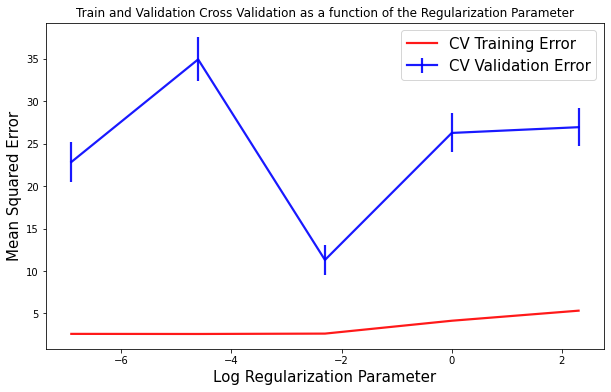

The lowest mean validation MSE occurs at regularization parameter of 0.1
The corresponding mean train MSE value is 2.584282148179919
The corresponding mean validation MSE value is 11.302473103286472


In [56]:
 %%capture --no-stdout --no-display
# your code here
# Load split datasets
x_train = df_train[['Spreading_factor']].values
y_train = df_train['Perc_population'].values
x_val = df_test[['Spreading_factor']].values
y_val = df_test['Perc_population'].values

### Use polynomial features with degree 30
d = 30

# Initialize alpha values
alphas = [0.001, 0.01, 0.1, 1, 10]

# Initialize lists to store cross-validation MSEs
cross_validation_error_train = []
cross_validation_error_val = []
std_dev_val = []

for a in alphas:
    # Compute the polynomial features for the train data
    x_poly_train = PolynomialFeatures(degree=d).fit_transform(x_train)

    # Compute the polynomial features for the validation data
    x_poly_val = PolynomialFeatures(degree=d).fit_transform(x_val)
    
    # Initialize a LASSO regression model
    lasso_model = Lasso(alpha=a, max_iter = 20000).fit(x_poly_train, y_train)
    
    # Perform cross-validation on the train and test data with 10 folds and get the mse_scores
    mse_score_train = cross_validate(lasso_model, x_poly_train, y_train, cv=10, scoring="neg_mean_squared_error", return_train_score=True )
    mse_score_val = cross_validate(lasso_model, x_poly_val, y_val, cv=10, scoring="neg_mean_squared_error", return_train_score=True )
    
    # Compute the mean of the cross validation error and store in respective list 
    cross_validation_error_train.append(-1*np.mean(mse_score_train['test_score']))
    cross_validation_error_val.append(-1*np.mean(mse_score_val['test_score']))
    
    # Compute normalized standard deviation and add to list
    std_dev_val.append(np.std(mse_score_val['test_score'])/(-1*np.mean(mse_score_val['test_score'])))
    
### Generate a single plot showing the mean train and validation  𝑀𝑆𝐸  values for each degree polynomial regression,
### including the +/- 1 standard deviation bounds for the validation  𝑀𝑆𝐸  values.
fig, ax = plt.subplots(figsize = (10,6))
ax.plot(np.log(alphas), cross_validation_error_train, color='r', alpha = 0.9, label = "CV Training Error", lw=2.2)
ax.errorbar(np.log(alphas), cross_validation_error_val, yerr=std_dev_val, color='b', alpha = 0.9, label = "CV Validation Error", lw=2.2)
ax.legend(loc='best',fontsize=15)
ax.set_xlabel("Log Regularization Parameter", fontsize=15)
ax.set_ylabel("Mean Squared Error", fontsize=15)
ax.set_title("Train and Validation Cross Validation as a function of the Regularization Parameter")
plt.show();

### Print the degree of the best model, identified based on the lowest mean validation  𝑀𝑆𝐸 , along with the corresponding mean train and validation  𝑀𝑆𝐸  values.
min_mse_train = min(cross_validation_error_train)
min_mse_val = min(cross_validation_error_val)
best_alpha = alphas[cross_validation_error_val.index(min_mse_val)]
print("The lowest mean validation MSE occurs at regularization parameter of " + str(best_alpha))
print("The corresponding mean train MSE value is " + str(min_mse_train))
print("The corresponding mean validation MSE value is " + str(min_mse_val))


**INTERPRETATION:**

I did receive the convergence error warnings and this is due to the number of iterations being too small. I did increase by a factor of 20 and 100 as the hints alluded to but this did not resolve the issue. Increasing the number of iterations allows LASSO to get closer to the point of convergence but I was not able to run enough iterations to achieve that. I also tried increasing the tolerance but that did not yield good results- the results were not differentiated between the different alpha values.


<div class='exercise-r'>

**6.2 Find the most significant degrees**

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this best $\alpha$ value to find the "most significant" set of polynomial degrees by using bootstraps.

What we mean by this is, for each bootstrap of the data, you will get some set of degrees that are **significant**, as will be indicated by the value of their coefficients. Typically, while using $LASSO$ regularization, we would consider $\mid\beta_i\mid \gt 0$ as an indication of a particular coefficient's significance. However, for this particular exercise, we are going to use $\mid\beta_i\mid \gt 0.1$ as our criteria for significance (we have found this $0.1$ threshold to work well when designing this particular problem).

Based on this criteria, you will identify which degree coefficients are significant over many bootstrapped iterations with $n=30$ polynomial features and your chosen best $\alpha$ from Question 6.1.

- Use polynomial features with **degree 30**.
- Use a dictionary called `significant_degrees` to store a cumulative count for each degree identified as significant during your bootstraps.
- Run at least 100 bootstraps of your data.
- For each bootstrap:
  - Train a `Lasso(...)` model with the `best_alpha` identified in Question 6.1.
  - Identify the significant polynomial degree coefficients using $\mid\beta_i\mid \gt 0.1 $ as our threshold for significance.
  - For each significant coefficient, update the count of that degree in your `significant_degrees` dictionary.
- Generate a bar plot showing the count for each degree, showing how many times it was identified as significant over your bootstraps.
- Based on this plot, there should likely be a clear maximum degree, above which, few if any iterations have been identified as significant. Interpret your bar plot, choose a maximum degree polynomial based upon it, and explain your rationale for choosing that degree.

</div>

In [67]:
 %%capture --no-stdout --no-display

# your code here
## Use polynomial features with degree 30.
degree = 30

## Use a dictionary called significant_degrees to store a 
## cumulative count for each degree identified as significant during your bootstraps.
significant_degrees = {}

for d in range(0, degree+1):
    significant_degrees[d] = 0
    
## Run at least 100 bootstraps of your data.
numboot = 100
for i in range(numboot):
    # Create bootstrapped version of the training data using the sample function
    # Set frac=1 and replace=True to get a bootstrap
    df_new = df_train.sample(frac=1, replace=True)

    # Get the predictor data ('Spreading_factor') from the new bootstrapped data
    x_sample = df_new[['Spreading_factor']]

    # Get the response data ('Perc_population') from the new bootstrapped data
    y_sample = df_new.Perc_population
    
    # Compute the polynomial features for the train data
    x_poly_sample = PolynomialFeatures(degree=d).fit_transform(x_sample)
    
    # Initialize a LASSO regression model
    # Train a Lasso(...) model with the best_alpha identified in Question 6.1.
    lasso_model = Lasso(alpha=best_alpha, max_iter = 20000).fit(x_poly_sample, y_sample)
        
    # Identify the significant polynomial degree coefficients using ∣𝛽𝑖∣>0.1  as our threshold for significance.
    # For each significant coefficient, update the count of that degree in your significant_degrees dictionary.
    significant_beta = 0.1
    for i, coef in enumerate(lasso_model.coef_):
        if (coef > significant_beta):
            significant_degrees[i] += 1


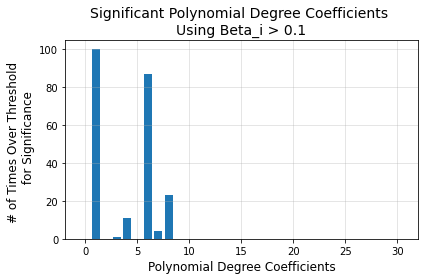

{0: 0, 1: 100, 2: 0, 3: 1, 4: 11, 5: 0, 6: 87, 7: 4, 8: 23, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0}


In [72]:
### Generate a bar plot showing the count for each degree, showing how many times it was identified as 
### significant over your bootstraps.
plt.bar(significant_degrees.keys(), significant_degrees.values())

# Graph the train and test data as well as the polynomial fit
plt.title(
    "Significant Polynomial Degree Coefficients \n"
    "Using Beta_i > 0.1",
    fontsize=14,
)
plt.xlabel("Polynomial Degree Coefficients", fontsize=12)
plt.ylabel("# of Times Over Threshold \n for Significance", fontsize=12)
plt.grid(":", alpha=0.4)

plt.tight_layout()
plt.show()

print(significant_degrees)

**INTERPRETATION:**

**your answer here**


<div class='exercise-r'>

**6.3 Compute and print the test $MSE$**

From our Question 6.2 results, we can see that only some degrees are consistently significant over many bootstraps. You will now retrain the $L1$ regularized model on the entire **training** data and find the test $MSE$.

- Use polynomial features based on the maximum degree you identified using your results from Question 6.2 (for the sake of simplicity, use all degrees up to that maximum degree as is typically done in polynomial regression).
- Train your **LASSO** regularized model using your `best_alpha` hyper-parameter on the entire training set.
- Generate a plot of the data and your regression curve (similar to [Question 2.1](#part2)).
- Report the polynomial degrees and corresponding coefficients for this fully trained model that have an absolute value greater than 0.1 (i.e. $\mid\beta_i\mid \gt 0.1 $).
- Report the train and test $MSE$ and save the test $MSE$ to `best_mse_dict`.

</div>

In [19]:
# your code here


<div class='exercise-r'>

**6.4 What are your observations?**

- Compare your `best_degree` from [Question 5](#part5solutions) with your chosen degree in 6.3 above and comment on the difference.
- Compare your test $MSE$ in this question with the result from question 5. Which one is smaller, and by how much?
- Which degree coefficients in your best fit model from 6.3 are significant? If not all coefficients are significant, why?
- Would you expect your current model from 6.3 to be more "reliable" or robust than the models in Question 5 and prior? On what basis would you make a claim of its robustness?

</div>

**your answer here**


<a id="part7"></a>

## <div class='exercise'>Question 7: Analyze your best test MSEs for each sub section of the homework [6 pts]</div> 

[Return to contents](#contents)


**7.1** Convert the `best_mse_dict` dictionary used to store the best $MSE$ values from each section of the homework into a Pandas dataframe. Generate a bar plot illustrating the $MSE$ values in that dataframe and also display the resulting dataframe.

**7.2** Which model do you think is best, and why? What are some of that model's drawbacks compared to the other models? 

<a id="part7solutions"></a>

## Question 7: Solutions

[Return to contents](#contents)

<div class='exercise-r'>

**7.1** Convert the `best_mse_dict` dictionary used to store the best $MSE$ values from each section of the homework into a Pandas dataframe. Generate a bar plot illustrating the $MSE$ values in that dataframe and also display the resulting dataframe.

</div>

In [20]:
# your code here


<div class='exercise-r'>

**7.2** Which model do you think is best, and why? What are some of that model's drawbacks compared to the other models? 

</div>

**your answer here**


#### THE END